In [30]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import models, layers

import warnings 
warnings.filterwarnings("ignore")
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [31]:
folder=r"C:\Users\thota\OneDrive\Pictures\malharsh\Dataset\Train"

In [32]:
tf.keras.utils.image_dataset_from_directory??

In [33]:
data=tf.keras.utils.image_dataset_from_directory(folder,image_size=(50,50),class_names=["Parasite","Uninfected"])

Found 416 files belonging to 2 classes.


In [34]:
data_iterator=data.as_numpy_iterator()

In [35]:
batch=data_iterator.next()

In [36]:
batch[0].max()

252.38882

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


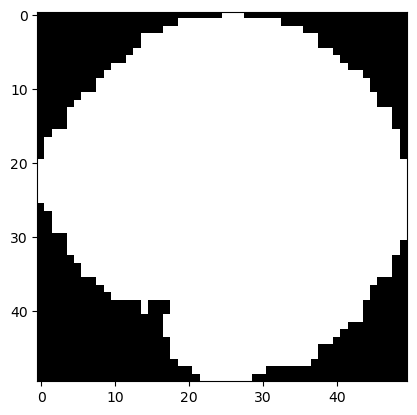

In [37]:
plt.imshow(batch[0][0])

In [38]:
data=data.map(lambda x,y:(x/255,y))

In [39]:
data.as_numpy_iterator().next()[0].max()

0.99890196

# splitting of our data 

In [40]:
len(data)

13

In [41]:
train_size=int(len(data)*0.7)
val_size=int(len(data)*0.2)
test_size=int(len(data)*0.1)

In [42]:
train_size,val_size,test_size

(9, 2, 1)

In [43]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [44]:
input_shape=(50,50,3)

In [45]:
model = models.Sequential([
    layers.Conv2D(64, (3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation = 'relu', padding ='SAME'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(256, (3,3), activation = 'relu',padding ='SAME'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1, activation= 'sigmoid')
    
])

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 48, 48, 64)        1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 256)       295168    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 256)       

In [47]:
model.compile(
    optimizer= 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [48]:
history = model.fit(train,
         epochs= 30,
         validation_data= val)


Epoch 1/30
9/9 [==============================] - 3s 247ms/step - loss: 0.6919 - accuracy: 0.5486 - val_loss: 0.6915 - val_accuracy: 0.5938
Epoch 2/30
9/9 [==============================] - 2s 218ms/step - loss: 0.6838 - accuracy: 0.5833 - val_loss: 0.6959 - val_accuracy: 0.4844
Epoch 3/30
9/9 [==============================] - 2s 226ms/step - loss: 0.6665 - accuracy: 0.5938 - val_loss: 0.6312 - val_accuracy: 0.7969
Epoch 4/30
9/9 [==============================] - 2s 219ms/step - loss: 0.6289 - accuracy: 0.6632 - val_loss: 0.5368 - val_accuracy: 0.7656
Epoch 5/30
9/9 [==============================] - 2s 213ms/step - loss: 0.4833 - accuracy: 0.7743 - val_loss: 1.0208 - val_accuracy: 0.5000
Epoch 6/30
9/9 [==============================] - 2s 206ms/step - loss: 0.7580 - accuracy: 0.5694 - val_loss: 0.6517 - val_accuracy: 0.6094
Epoch 7/30
9/9 [==============================] - 2s 205ms/step - loss: 0.6299 - accuracy: 0.6076 - val_loss: 0.5574 - val_accuracy: 0.8750
Epoch 8/30
9/9 [====

In [49]:
model.evaluate(test)

1/1 [==============================] - 0s 276ms/step - loss: 0.0352 - accuracy: 1.0000


[0.035166315734386444, 1.0]

In [50]:
EPOCHS=30

In [51]:
# Getting the model history to analyse
train_loss = history.history['loss']
train_acc = history.history['accuracy']

val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

Text(0.5, 1.0, 'Training and Validation Loss')

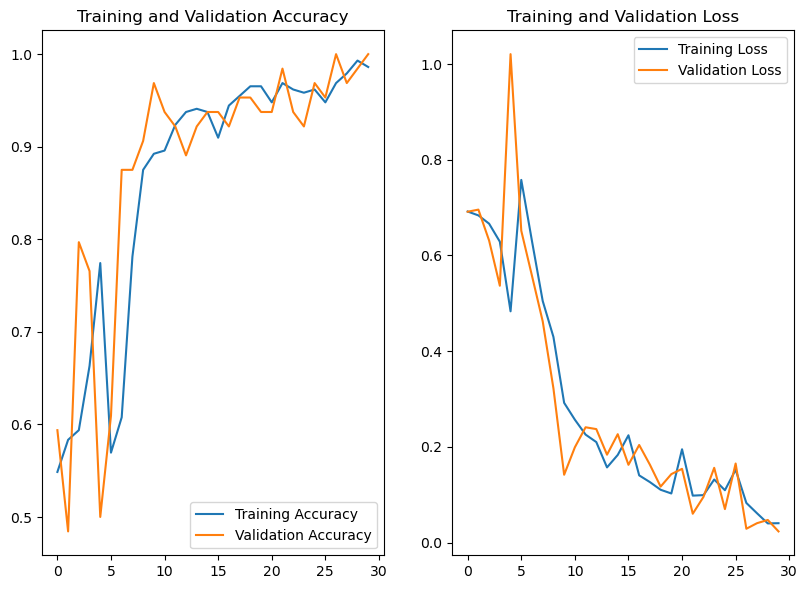

In [52]:
#graphs for accuracy and loss of training and validation data
plt.figure(figsize = (15,15))
plt.subplot(2,3,1)
plt.plot(range(EPOCHS), train_acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy') 

plt.subplot(2,3,2)
plt.plot(range(EPOCHS), train_loss, label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')

In [53]:
model.save('malaria_mass.h5')

In [54]:
import cv2

In [55]:
def predict_malaria(img):
    image=cv2.imread(img)
    resize=tf.image.resize(image,(50,50))
    scale=np.expand_dims(resize/255,0)
    pred=model.predict(scale)
    return pred
    
    
    
    

In [69]:
x=predict_malaria(r"C:\Users\thota\OneDrive\Pictures\malharsh\Dataset\Test\Parasite\C39P4thinF_original_IMG_20150622_105554_cell_24.png")
if x>0.5:
    print("dont have malaria")
else:
    print("malaria")

1/1 [==============================] - 0s 25ms/step
malaria
